In [ ]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Input, Dropout
from keras import optimizers
from keras.optimizers import Adam
from matplotlib import pyplot as plt
import math

In [ ]:
class MLP():
  def __init__(self,learning_rate = 0.01,
               hidden_neurons = 32,
               activation = 'relu',
               loss = 'categorical_crossentropy',
               epochs = 10,
               batch_size = 512,
               momentum = 0.9,
               verbose = 2,
               optimizer = 'adam',
               initializer='xavier'):
    
    self.epochs = epochs
    self.batch_size = batch_size
    self.optimizer = optimizer
    self.learning_rate = learning_rate
    self.hidden_neurons = hidden_neurons
    self.activation = activation
    self.loss = loss
    self.verbose = verbose
    self.layer_name = "bottleneck"
    self.MLP = None
    self.momentum = momentum
    self.initializer = initializer
    

  def get_optimizer(self):

    lr = self.get_learning_rate()

    if self.optimizer.lower() == 'adam':
      opt = keras.optimizers.Adam(learning_rate=lr)
    elif self.optimizer.lower().startswith('rms'):
      opt = keras.optimizers.RMSprop(learning_rate=lr)
    elif self.optimizer.lower() == 'SGD_momentum':
      opt = keras.optimizers.SGD(learning_rate=lr, momentum=self.momentum)
    else:
      opt = keras.optimizers.SGD(learning_rate=lr)

    return opt

  def get_initializer(self):
    if self.initializer == "xavier":
      return keras.initializers.GlorotUniform()
    elif self.initializer == "uniform":
      return keras.initializers.RandomUniform()
    elif self.initializer == "normal":
      return keras.initializers.RandomNormal()


  def get_learning_rate(self):
    lr_schedule = keras.optimizers.schedules.ExponentialDecay(
        self.learning_rate,
        decay_steps=100000,
        decay_rate=0.96,
        staircase=True)    

    return lr_schedule


  def fit_MLP(self,trainX,trainY,testX,testY):

    input_shape = trainX.shape[1]
    opt = self.get_optimizer()

    initializer = self.get_initializer()

    mlp = Sequential()
    mlp.add(Dense(512,  activation=self.activation,kernel_initializer=initializer))
    mlp.add(Dropout(0.4))
    mlp.add(Dense(256,  activation=self.activation))
    mlp.add(Dropout(0.3))
    mlp.add(Dense(128,   activation=self.activation))
    mlp.add(Dropout(0.3))
    mlp.add(Dense(64,   activation=self.activation))
    mlp.add(Dropout(0.3))
    mlp.add(Dense(32,   activation=self.activation))
    mlp.add(Dropout(0.3))
    mlp.add(Dense(10,   activation="softmax"))
    

    mlp.compile(loss=self.loss, optimizer = opt, metrics = ['accuracy'],)
    trained_model = mlp.fit(trainX, trainY, batch_size=self.batch_size,
                                    epochs=self.epochs, verbose=self.verbose, validation_data=(testX, testY))
    
    self.mlp = mlp
    return trained_model

  def predict_MLP(self,testX,testY):
    return self.mlp.evaluate(testX, testY, verbose=0)



In [ ]:
## loading the data

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 784) / 255
x_test = x_test.reshape(10000, 784) / 255

X = np.concatenate((x_train,x_test))
y = np.concatenate((y_train, y_test))

from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(X, y, test_size = 0.3, random_state = 42)

## Data prerocessing (reshape and normalize)
trainY = keras.utils.to_categorical(trainY,10)
testY = keras.utils.to_categorical(testY,10)

11493376/11490434 [==============================] - 0s 0us/step


## Using Adam optimizer

In [ ]:
model_adam = MLP(optimizer="adam")
trained_model_adam = model_adam.fit_MLP(trainX,trainY,testX,testY)

Epoch 1/10
96/96 - 4s - loss: 0.8742 - accuracy: 0.7174 - val_loss: 0.2780 - val_accuracy: 0.9277
Epoch 2/10
96/96 - 0s - loss: 0.3814 - accuracy: 0.9093 - val_loss: 0.2041 - val_accuracy: 0.9503
Epoch 3/10
96/96 - 0s - loss: 0.3091 - accuracy: 0.9274 - val_loss: 0.1865 - val_accuracy: 0.9577
Epoch 4/10
96/96 - 0s - loss: 0.2794 - accuracy: 0.9349 - val_loss: 0.1744 - val_accuracy: 0.9585
Epoch 5/10
96/96 - 0s - loss: 0.2637 - accuracy: 0.9393 - val_loss: 0.1756 - val_accuracy: 0.9592
Epoch 6/10
96/96 - 0s - loss: 0.2425 - accuracy: 0.9429 - val_loss: 0.1616 - val_accuracy: 0.9630
Epoch 7/10
96/96 - 0s - loss: 0.2300 - accuracy: 0.9454 - val_loss: 0.1632 - val_accuracy: 0.9619
Epoch 8/10
96/96 - 0s - loss: 0.2246 - accuracy: 0.9489 - val_loss: 0.1563 - val_accuracy: 0.9630
Epoch 9/10
96/96 - 0s - loss: 0.2358 - accuracy: 0.9447 - val_loss: 0.1735 - val_accuracy: 0.9633
Epoch 10/10
96/96 - 0s - loss: 0.2248 - accuracy: 0.9488 - val_loss: 0.1626 - val_accuracy: 0.9649


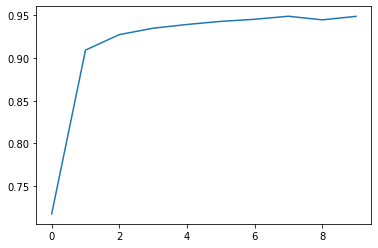

In [ ]:
epoch = np.arange(10)
accuracies = trained_model_adam.history['accuracy']
plt.plot(epoch,accuracies)
plt.show()

In [ ]:
print("Test accuracy: ",trained_model_adam.history['val_accuracy'][-1]*100 )

Test accuracy:  96.48571610450745


## Using RMSProp optimizer

In [ ]:
model_rms = MLP(optimizer="rms")
trained_model_rms = model_rms.fit_MLP(trainX,trainY,testX,testY)

Epoch 1/10
96/96 - 1s - loss: 1.4954 - accuracy: 0.4979 - val_loss: 0.5001 - val_accuracy: 0.8239
Epoch 2/10
96/96 - 0s - loss: 0.5437 - accuracy: 0.8571 - val_loss: 0.2695 - val_accuracy: 0.9378
Epoch 3/10
96/96 - 0s - loss: 0.3809 - accuracy: 0.9100 - val_loss: 0.2296 - val_accuracy: 0.9405
Epoch 4/10
96/96 - 0s - loss: 0.3395 - accuracy: 0.9220 - val_loss: 0.2242 - val_accuracy: 0.9492
Epoch 5/10
96/96 - 0s - loss: 0.3046 - accuracy: 0.9318 - val_loss: 0.2431 - val_accuracy: 0.9495
Epoch 6/10
96/96 - 0s - loss: 0.2874 - accuracy: 0.9371 - val_loss: 0.1906 - val_accuracy: 0.9546
Epoch 7/10
96/96 - 0s - loss: 0.2615 - accuracy: 0.9422 - val_loss: 0.1768 - val_accuracy: 0.9650
Epoch 8/10
96/96 - 0s - loss: 0.2551 - accuracy: 0.9446 - val_loss: 0.2043 - val_accuracy: 0.9620
Epoch 9/10
96/96 - 0s - loss: 0.2447 - accuracy: 0.9459 - val_loss: 0.1627 - val_accuracy: 0.9648
Epoch 10/10
96/96 - 0s - loss: 0.2331 - accuracy: 0.9471 - val_loss: 0.1726 - val_accuracy: 0.9635


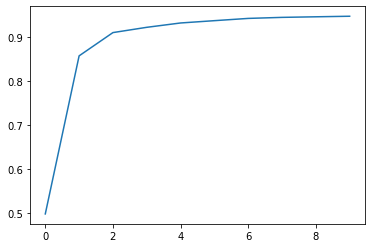

In [ ]:
epoch = np.arange(10)
accuracies = trained_model_rms.history['accuracy']
plt.plot(epoch,accuracies)
plt.show()

In [ ]:
print("Test accuracy: ",trained_model_rms.history['val_accuracy'][-1]*100 )

Test accuracy:  96.3523805141449


## Using SGD optimizer without momentum

In [ ]:
model_sgd = MLP(optimizer="SGD",epochs = 100,verbose=0)
trained_model_sgd = model_sgd.fit_MLP(trainX,trainY,testX,testY)

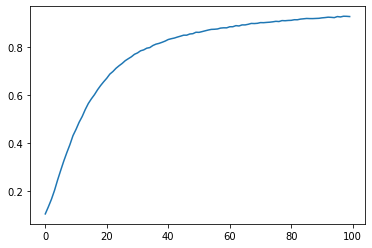

In [ ]:
epoch = np.arange(100)
accuracies = trained_model_sgd.history['accuracy']
plt.plot(epoch,accuracies)
plt.show()

In [ ]:
print("Test accuracy: ",trained_model_sgd.history['val_accuracy'][-1]*100 )

Test accuracy:  95.68095207214355


## Using SGD optimizer without momentum

In [ ]:
model_sgd_momentum = MLP(optimizer="SGD_momentum",epochs=100,verbose=0)
trained_model_sgd_momentum = model_sgd_momentum.fit_MLP(trainX,trainY,testX,testY)

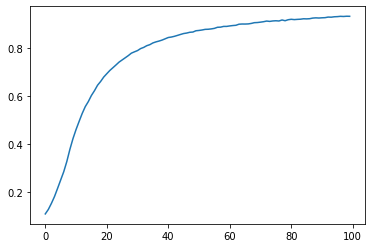

In [ ]:
epoch = np.arange(100)
accuracies = trained_model_sgd_momentum.history['accuracy']
plt.plot(epoch,accuracies)
plt.show()

In [ ]:
print("Test accuracy: ",trained_model_sgd_momentum.history['val_accuracy'][-1]*100 )

Test accuracy:  95.87143063545227


#### Observation

- Best accuracy is found using `Adam` optimizer
- So use this optimizer to test for different initialization methods

# Experimenting with different weights initialization methods

### Using Xavier initialization

Epoch 1/10
96/96 - 1s - loss: 0.8873 - accuracy: 0.7184 - val_loss: 0.2655 - val_accuracy: 0.9365
Epoch 2/10
96/96 - 0s - loss: 0.3961 - accuracy: 0.9076 - val_loss: 0.1945 - val_accuracy: 0.9511
Epoch 3/10
96/96 - 0s - loss: 0.3252 - accuracy: 0.9239 - val_loss: 0.1899 - val_accuracy: 0.9554
Epoch 4/10
96/96 - 0s - loss: 0.2907 - accuracy: 0.9326 - val_loss: 0.1982 - val_accuracy: 0.9545
Epoch 5/10
96/96 - 0s - loss: 0.2796 - accuracy: 0.9354 - val_loss: 0.1750 - val_accuracy: 0.9610
Epoch 6/10
96/96 - 0s - loss: 0.2550 - accuracy: 0.9405 - val_loss: 0.1866 - val_accuracy: 0.9606
Epoch 7/10
96/96 - 0s - loss: 0.2452 - accuracy: 0.9431 - val_loss: 0.1644 - val_accuracy: 0.9625
Epoch 8/10
96/96 - 0s - loss: 0.2396 - accuracy: 0.9437 - val_loss: 0.1489 - val_accuracy: 0.9648
Epoch 9/10
96/96 - 0s - loss: 0.2337 - accuracy: 0.9463 - val_loss: 0.1679 - val_accuracy: 0.9641
Epoch 10/10
96/96 - 0s - loss: 0.2290 - accuracy: 0.9464 - val_loss: 0.1604 - val_accuracy: 0.9648






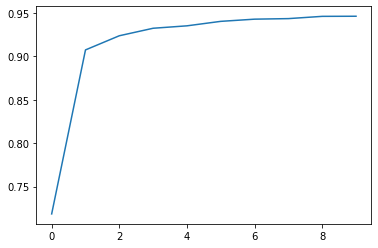





Test accuracy:  96.47619128227234


In [ ]:
model_adam = MLP(optimizer="adam")
trained_model_adam = model_adam.fit_MLP(trainX,trainY,testX,testY)


print("\n\n\n")
epoch = np.arange(10)
accuracies = trained_model_adam.history['accuracy']
plt.plot(epoch,accuracies)
plt.show()


print("\n\n\n")
print("Test accuracy: ",trained_model_adam.history['val_accuracy'][-1]*100 )

### Using uniform initialization

Epoch 1/10
96/96 - 1s - loss: 0.9195 - accuracy: 0.7008 - val_loss: 0.2525 - val_accuracy: 0.9299
Epoch 2/10
96/96 - 0s - loss: 0.3929 - accuracy: 0.9048 - val_loss: 0.2423 - val_accuracy: 0.9430
Epoch 3/10
96/96 - 0s - loss: 0.3305 - accuracy: 0.9212 - val_loss: 0.1855 - val_accuracy: 0.9553
Epoch 4/10
96/96 - 0s - loss: 0.2949 - accuracy: 0.9284 - val_loss: 0.1906 - val_accuracy: 0.9558
Epoch 5/10
96/96 - 0s - loss: 0.2697 - accuracy: 0.9343 - val_loss: 0.1868 - val_accuracy: 0.9557
Epoch 6/10
96/96 - 0s - loss: 0.2511 - accuracy: 0.9420 - val_loss: 0.1594 - val_accuracy: 0.9615
Epoch 7/10
96/96 - 0s - loss: 0.2515 - accuracy: 0.9402 - val_loss: 0.1566 - val_accuracy: 0.9638
Epoch 8/10
96/96 - 0s - loss: 0.2372 - accuracy: 0.9455 - val_loss: 0.1559 - val_accuracy: 0.9637
Epoch 9/10
96/96 - 0s - loss: 0.2366 - accuracy: 0.9461 - val_loss: 0.1571 - val_accuracy: 0.9630
Epoch 10/10
96/96 - 0s - loss: 0.2256 - accuracy: 0.9472 - val_loss: 0.1680 - val_accuracy: 0.9640






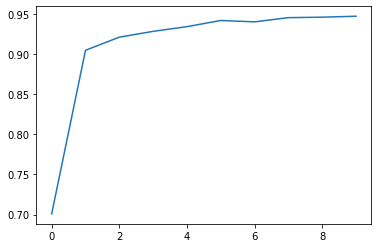





Test accuracy:  96.39999866485596


In [ ]:
model_adam = MLP(optimizer="adam",initializer="uniform")
trained_model_adam = model_adam.fit_MLP(trainX,trainY,testX,testY)


print("\n\n\n")
epoch = np.arange(10)
accuracies = trained_model_adam.history['accuracy']
plt.plot(epoch,accuracies)
plt.show()


print("\n\n\n")
print("Test accuracy: ",trained_model_adam.history['val_accuracy'][-1]*100 )

### Using normal initialization

Epoch 1/10
96/96 - 1s - loss: 0.8351 - accuracy: 0.7306 - val_loss: 0.2791 - val_accuracy: 0.9292
Epoch 2/10
96/96 - 0s - loss: 0.3767 - accuracy: 0.9072 - val_loss: 0.1877 - val_accuracy: 0.9528
Epoch 3/10
96/96 - 0s - loss: 0.3132 - accuracy: 0.9251 - val_loss: 0.1991 - val_accuracy: 0.9532
Epoch 4/10
96/96 - 0s - loss: 0.2724 - accuracy: 0.9352 - val_loss: 0.1733 - val_accuracy: 0.9616
Epoch 5/10
96/96 - 0s - loss: 0.2592 - accuracy: 0.9401 - val_loss: 0.1605 - val_accuracy: 0.9625
Epoch 6/10
96/96 - 0s - loss: 0.2516 - accuracy: 0.9411 - val_loss: 0.1607 - val_accuracy: 0.9629
Epoch 7/10
96/96 - 0s - loss: 0.2363 - accuracy: 0.9439 - val_loss: 0.1637 - val_accuracy: 0.9657
Epoch 8/10
96/96 - 0s - loss: 0.2255 - accuracy: 0.9490 - val_loss: 0.1545 - val_accuracy: 0.9650
Epoch 9/10
96/96 - 0s - loss: 0.2205 - accuracy: 0.9486 - val_loss: 0.1643 - val_accuracy: 0.9635
Epoch 10/10
96/96 - 0s - loss: 0.2219 - accuracy: 0.9488 - val_loss: 0.1588 - val_accuracy: 0.9659






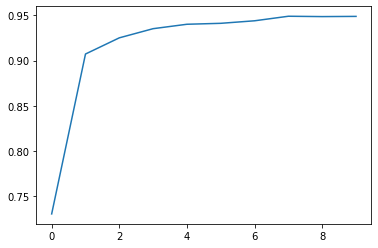





Test accuracy:  96.59047722816467


In [ ]:
model_adam = MLP(optimizer="adam",initializer="normal")
trained_model_adam = model_adam.fit_MLP(trainX,trainY,testX,testY)


print("\n\n\n")
epoch = np.arange(10)
accuracies = trained_model_adam.history['accuracy']
plt.plot(epoch,accuracies)
plt.show()


print("\n\n\n")
print("Test accuracy: ",trained_model_adam.history['val_accuracy'][-1]*100 )

#### Observations:

- Using normal distriution we are able to get more accuracy 

## Using different learning rates

In [ ]:
learning_rates = [0.01,0.02,0.001,0.0001,0.0005]

accuracies_lr = []

for lr in learning_rates:
  model_adam = MLP(optimizer="adam",initializer="normal",learning_rate = 0.01,verbose=0)
  trained_model_adam = model_adam.fit_MLP(trainX,trainY,testX,testY)
  accuracies_lr.append(trained_model_adam.history['val_accuracy'][-1]*100)
  print(f"For {lr} we got test accuracy: ",trained_model_adam.history['val_accuracy'][-1]*100 )

For 0.01 we got test accuracy:  96.75238132476807
For 0.02 we got test accuracy:  96.76666855812073
For 0.001 we got test accuracy:  96.44285440444946
For 0.0001 we got test accuracy:  96.61428332328796
For 0.0005 we got test accuracy:  96.5238094329834


### Observation:

With learning rate as 0.02 we got more accuracy

In [ ]:
class Autoencoder():
  def __init__(self,learning_rate = 0.01,
               hidden_neurons = 32,
               activation = 'relu',
               loss = 'mean_squared_error',
               epochs = 10,
               batch_size = 512,
               momentum = 0.9,
               verbose = 1,
               optimizer = 'adam'):
    
    self.epochs = epochs
    self.batch_size = batch_size
    self.optimizer = optimizer
    self.learning_rate = learning_rate
    self.hidden_neurons = hidden_neurons
    self.activation = activation
    self.loss = loss
    self.verbose = verbose
    self.layer_name = "bottleneck"
    self.autoencoder = None
    self.momentum = momentum

  def get_optimizer(self):
    if self.optimizer.lower() == 'adam':
      opt = keras.optimizers.Adam(learning_rate=self.learning_rate)
    elif self.optimizer.lower().startswith('rms'):
      opt = keras.optimizers.RMSprop(learning_rate=self.learning_rate)
    elif self.optimizer.lower() == 'SGD_momentum':
      opt = keras.optimizers.SGD(learning_rate=self.learning_rate, momentum=self.momentum)
    else:
      opt = keras.optimizers.SGD(learning_rate=self.learning_rate)

    return opt

  def fit_autoencoder(self,train,test):

    input_shape = train.shape[1]
    opt = self.get_optimizer()

    autoencoder = Sequential()
    autoencoder.add(Dense(512,  activation=self.activation, input_shape=(input_shape,)))
    autoencoder.add(Dense(128,  activation=self.activation))
    autoencoder.add(Dense(64,   activation=self.activation))

    autoencoder.add(Dense(self.hidden_neurons, activation=self.activation, name=self.layer_name))

    autoencoder.add(Dense(64,   activation=self.activation))
    autoencoder.add(Dense(128,  activation=self.activation))
    autoencoder.add(Dense(512,  activation=self.activation))
    autoencoder.add(Dense(784,  activation=self.activation))

    autoencoder.compile(loss=self.loss, optimizer = opt)
    trained_model = autoencoder.fit(train, train, batch_size=self.batch_size,
                                    epochs=self.epochs, verbose=self.verbose, validation_data=(test, test))
    
    self.autoencoder = autoencoder
    return trained_model

  def get_encoded_data(self,data):
    encoder = Model(self.autoencoder.input, self.autoencoder.get_layer(self.layer_name).output)
    encoded_data = encoder.predict(data) 
    return encoded_data
  
  def get_decoded_data(self,encoded_data):
    no_of_layers = int(len(self.autoencoder.layers)//2)
    
    encoded_input = Input(shape=(self.hidden_neurons,))
    decoder = self.autoencoder.layers[-no_of_layers](encoded_input)

    for i in range(1,no_of_layers):  
      decoder = self.autoencoder.layers[i-no_of_layers](decoder)

    decoder = Model(encoded_input, decoder)
    return decoder.predict(encoded_data)

  def predict(self,data):
    encoded_data = self.get_encoded_data(data)
    return get_decoded_data(encoded_data)



In [ ]:
model_adam = Autoencoder()
trained_model_adam = model_adam.fit_autoencoder(trainX,testX) 
encoded_data_test = model_adam.get_encoded_data(testX) 
encoded_data_train = model_adam.get_encoded_data(trainX) 

Epoch 1/10
96/96 [==============================] - 2s 13ms/step - loss: 0.8720 - val_loss: 0.0586
Epoch 2/10
96/96 [==============================] - 1s 11ms/step - loss: 0.0547 - val_loss: 0.0429
Epoch 3/10
96/96 [==============================] - 1s 11ms/step - loss: 0.0410 - val_loss: 0.0383
Epoch 4/10
96/96 [==============================] - 1s 11ms/step - loss: 0.0377 - val_loss: 0.0357
Epoch 5/10
96/96 [==============================] - 1s 11ms/step - loss: 0.0353 - val_loss: 0.0339
Epoch 6/10
96/96 [==============================] - 1s 11ms/step - loss: 0.0337 - val_loss: 0.0331
Epoch 7/10
96/96 [==============================] - 1s 11ms/step - loss: 0.0327 - val_loss: 0.0321
Epoch 8/10
96/96 [==============================] - 1s 10ms/step - loss: 0.0319 - val_loss: 0.0317
Epoch 9/10
96/96 [==============================] - 1s 10ms/step - loss: 0.0316 - val_loss: 0.0311
Epoch 10/10
96/96 [==============================] - 1s 10ms/step - loss: 0.0311 - val_loss: 0.0309


Epoch 1/10
96/96 - 1s - loss: 0.9478 - accuracy: 0.6624 - val_loss: 0.5370 - val_accuracy: 0.7952
Epoch 2/10
96/96 - 0s - loss: 0.6515 - accuracy: 0.7830 - val_loss: 0.5107 - val_accuracy: 0.8161
Epoch 3/10
96/96 - 0s - loss: 0.6374 - accuracy: 0.7899 - val_loss: 0.4942 - val_accuracy: 0.8392
Epoch 4/10
96/96 - 0s - loss: 0.6043 - accuracy: 0.8050 - val_loss: 0.4738 - val_accuracy: 0.8393
Epoch 5/10
96/96 - 0s - loss: 0.5954 - accuracy: 0.8078 - val_loss: 0.4807 - val_accuracy: 0.8459
Epoch 6/10
96/96 - 0s - loss: 0.6020 - accuracy: 0.8092 - val_loss: 0.4961 - val_accuracy: 0.8414
Epoch 7/10
96/96 - 0s - loss: 0.5927 - accuracy: 0.8110 - val_loss: 0.4666 - val_accuracy: 0.8473
Epoch 8/10
96/96 - 0s - loss: 0.5890 - accuracy: 0.8163 - val_loss: 0.4710 - val_accuracy: 0.8399
Epoch 9/10
96/96 - 0s - loss: 0.5798 - accuracy: 0.8150 - val_loss: 0.4751 - val_accuracy: 0.8408
Epoch 10/10
96/96 - 0s - loss: 0.5820 - accuracy: 0.8169 - val_loss: 0.4554 - val_accuracy: 0.8534






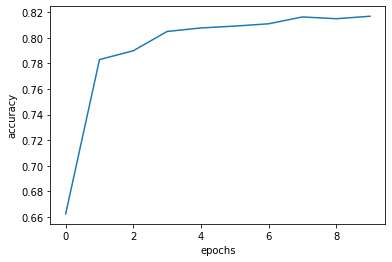





Test accuracy:  85.34285426139832


In [ ]:
model_adam = MLP(optimizer="adam",initializer="normal")
trained_model_adam = model_adam.fit_MLP(encoded_data_train,trainY,encoded_data_test,testY)


print("\n\n\n")
epoch = np.arange(10)
accuracies = trained_model_adam.history['accuracy']
plt.plot(epoch,accuracies)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.show()


print("\n\n\n")
print("Test accuracy: ",trained_model_adam.history['val_accuracy'][-1]*100 )

## Comparing accuries with original data as input and encoded data as input

- For 10 epochs
  - with original data as input: 96.5%
  - with encoded data as input: 85.34%